# Image visualization
---

The raw data from Vectra is in the format of tif. Here we convert the tif into RGB mode where each marker will be represented by one color,

## Load library

In [1]:
import subprocess
import os
import glob
from tqdm import tqdm
from davinci.vectra_tool import *
from PIL.TiffTags import TAGS
import tifffile
import matplotlib.pyplot as plt
import imageio

## Load image path and marker name

In [2]:
tif_files = sorted(glob.glob('../data/tif/*.tif') )
print('The order of marker in the list is:')
marker_list =   ['chan1', 'chan2', 'chan3', 'chan4', 'chan5', 'chan6', 'chan7'] #[x.description.split('<Name>')[1].split(' ')[0].split('<')[0].split('+')[0] for x in  tifffile.TiffFile(tif_files[0]).pages[:-1] ]
print(marker_list)

The order of marker in the list is:
['chan1', 'chan2', 'chan3', 'chan4', 'chan5', 'chan6', 'chan7']


## Assign each channel a color

In [3]:
## ([[0,255,0],[255,255,255],[0,255,255],[255,0,255],[255,255,0],[0,0,255],[255,0,0]])

The order of color in the color book is green, white, cyan, magenta, yellow, blue, red. Assign the color list with the color you want to assign for each channel. By default, we take 7 channels. 
Note: by default, we remove signals below intensity 1, and for image whose max intensity is below 25, we make it normalized by 25 to avoid amplification of noise. Check the code in utility convert_one_image function for details.

In [4]:
imagelist = tif_files
print('Image number:',len(imagelist))
for filepath in tqdm(imagelist):
	outputpath = filepath.replace("/tif/","/RGB/")
	os.makedirs(os.path.dirname(outputpath), exist_ok=True)
	convert_one_image(filepath,outputpath,channel_list=range(7),color_list=[0,3,1,2,4,6,5])
	#break

  0%|          | 0/2 [00:00<?, ?it/s]

Image number: 2


100%|██████████| 2/2 [00:01<00:00,  1.02s/it]


In [5]:
imagelist = tif_files
print('Image number:',len(imagelist))
for filepath in tqdm(imagelist):
	outputpath = filepath.replace("/tif/","/RGB_2/")
	os.makedirs(os.path.dirname(outputpath), exist_ok=True)
	convert_one_image(filepath,outputpath,channel_list=range(7),color_list=[0,1,2,3,4,5,6])
	#break

  0%|          | 0/2 [00:00<?, ?it/s]

Image number: 2


100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


## Visualization of RGB

### RGB color map 1

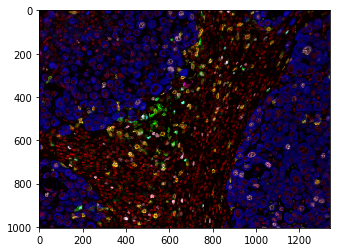

In [6]:
index=0
plt.imshow(imageio.imread(glob.glob('../data/RGB/*.png')[index]))

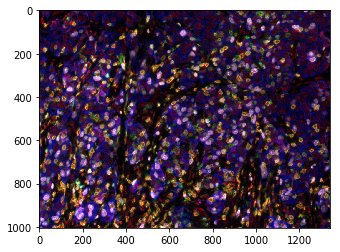

In [7]:
index=1
plt.imshow(imageio.imread(glob.glob('../data/RGB/*.png')[index]))

### RGB color map 2

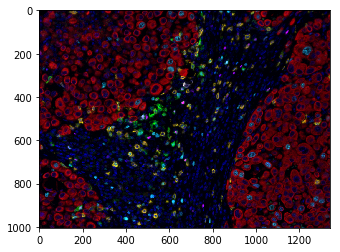

In [8]:
index=0
plt.imshow(imageio.imread(glob.glob('../data/RGB_2/*.png')[index]))

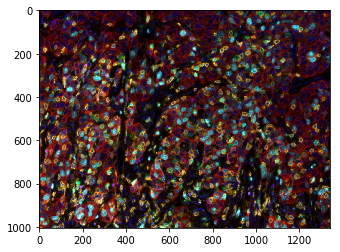

In [9]:
index=1
plt.imshow(imageio.imread(glob.glob('../data/RGB_2/*.png')[index]))